Author : Hind Bakkali - M1-IRIFS
# Coding Project - Watermark

## Project statement
Write code to automatically add a watermark to a photograph.

#### - Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

#### - Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


## Project implementation
*Show the initial images and their sizes :*

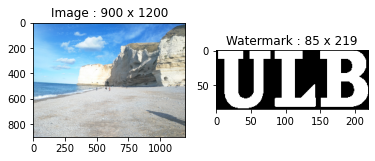

In [5]:
from matplotlib import pyplot as plt
from skimage.io import imread, imsave, imshow

image = imread('etretat.jpg')
wm = imread('watermark.png')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Image : %d x %d" %(image.shape[0],image.shape[1]))
plt.subplot(1,2,2)
plt.imshow(wm, cmap=plt.cm.gray)
plt.title("Watermark : %d x %d" %(wm.shape[0], wm.shape[1]))
plt.show()

*Add the watermark (in black) anywhere we want, and save the picture :*

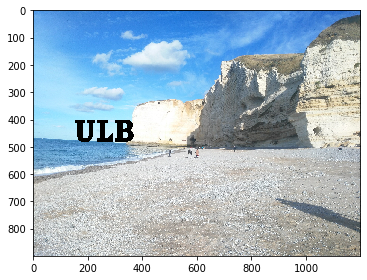

In [9]:
# add the watermark at a given position on a given image (x,y = top left corner)
def put_wm(image, wm, x, y):
    res = image.copy()
    # width of the wm
    for i in range(x, x + wm.shape[1]):
        # height of the wm
        for j in range(y, y + wm.shape[0]):
            # for white pixels in the wm (1 if binary, 255 if gray scale)
            if wm[j - y, i - x] != 0:
                # replace the needed pixel by a black pixel
                res[j, i] = 0
    return res

result = put_wm(image, wm, 150, 400)
imsave('image_marked.jpg', result)
plt.figure()
imshow(result)
plt.show()

*Add the watermark anywhere we want, and choose its opacity (op) :*

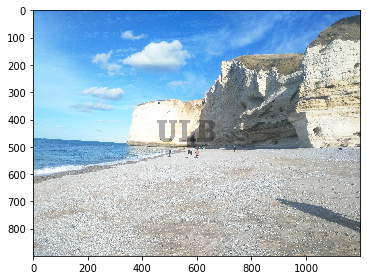

In [7]:
# op = 0 is black, then the closer we get to 1, the more the opacity diminishes
def put_wm(image, wm, x, y, op):
    res = image.copy()
    # width of the wm
    for i in range(x, x + wm.shape[1]):
        # height of the wm
        for j in range(y, y + wm.shape[0]):
            # for white pixels in the wm (1 if binary, 255 if gray scale)
            if wm[j - y, i - x] != 0:
                # change opacity of the pixel
                res[j, i] = op * res[j,i]
    return res

result = put_wm(image, wm, 450, 400, 0.7)
imsave('image_marked.jpg', result)
plt.figure()
imshow(result)
plt.show()

*Other way of computing it using a mask instead of a for loop :*

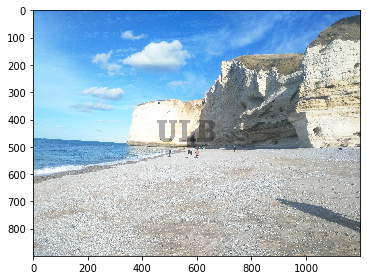

In [8]:
# using a mask instead of a for loop for a shorter function
def put_wm(image, wm, x, y, op):
    res = image.copy()
    mask = wm == 255    #(array of 0/1, can also be wm/255)
    #get area in image with size of mask
    res_wm = res[y:y+wm.shape[0],x:x+wm.shape[1]]
    #apply mask to area with given opacity
    res_wm[mask] = op * res_wm[mask]
    return res

result = put_wm(image, wm, 450, 400, 0.7)
imsave('image_marked.jpg', result)
plt.figure()
imshow(result)
plt.show()